In [1]:
import pickle
import pandas as pd

In [2]:
years_title = {}
f = open("NewsTitles.pickle", "rb")
years_title = pickle.load(f)
f.close()

In [3]:
month_list = []
year_list = []
news_headlines_list = []
for year in years_title.keys():
    for month in years_title[year].keys():
        year_list.append(year)
        month_list.append(month)
        news_headlines_list.append(years_title[year][month])

news_titles_dict = {'Year': year_list, 'Month': month_list, 'Headlines': news_headlines_list}

In [4]:
df = pd.DataFrame.from_dict(news_titles_dict)
print(df.head())

   Year   Month                                          Headlines
0  2020   April  1. India records sharpest spike in Covid-19 ca...
1  2020     May  1. Two more weeks, but not like before2. Speci...
2  2020    June  1. Over 8,000 new cases; India 8th worst in th...
3  2020    July  1. How bad did the Covid situation get in June...
4  2020  August  1. India’s deadliest month of Covid ends2. J&K...


In [5]:
from nltk import word_tokenize
from nltk import pos_tag
import string
import re
import nltk

In [6]:
my_stop_words = nltk.corpus.stopwords.words('english')
add_stop_words = ['india', 'news', "b'day", 'share', 'world', 'daily', 'day', 'time', 'bigger', 'new', 'bad', 'good']
my_stop_words.extend(add_stop_words)

In [7]:
def pos_filter(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives'''
    is_noun_ajd = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    all_nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_ajd(pos)] 
    return ' '.join(all_nouns_adj)

In [8]:
def clean_tokens(text):
    text = re.sub('\w*\d\w*', '', text)
    text = text.lower()
    tok = word_tokenize(text)
    tok = [char for char in tok if char not in string.punctuation]
    tok = [word for word in tok if len(word) >= 3 and word not in my_stop_words]

    text = ' '.join(tok)

    return text

In [9]:
df_pos_filter = pd.DataFrame(df['Headlines'].apply(pos_filter))
df_clean = pd.DataFrame(df_pos_filter['Headlines'].apply(clean_tokens))
df['Headlines'] = df_clean['Headlines']


In [10]:
print(df.head())

   Year   Month                                          Headlines
0  2020   April  records sharpest spike covid- migrant exodus m...
1  2020     May  weeks special trains migrants election maharas...
2  2020    June  cases worst trump postpones inclusion nepal ta...
3  2020    July  covid situation get june china nothing fatal i...
4  2020  August  deadliest month covid detentions mufti lone ba...


In [10]:
!pip install WordCloud
!pip install matplotlib

You should consider upgrading via the '/Users/aproy/DS/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(headlines):
    plt.figure(figsize=(20,20))
    wc = WordCloud(max_font_size=50, max_words=75, background_color="white")
    wordcloud_may = wc.generate_from_text(headlines)
    plt.imshow(wordcloud_may, interpolation="bilinear")
    plt.axis("off")
    plt.show()


--------------------------April  2020--------------------------


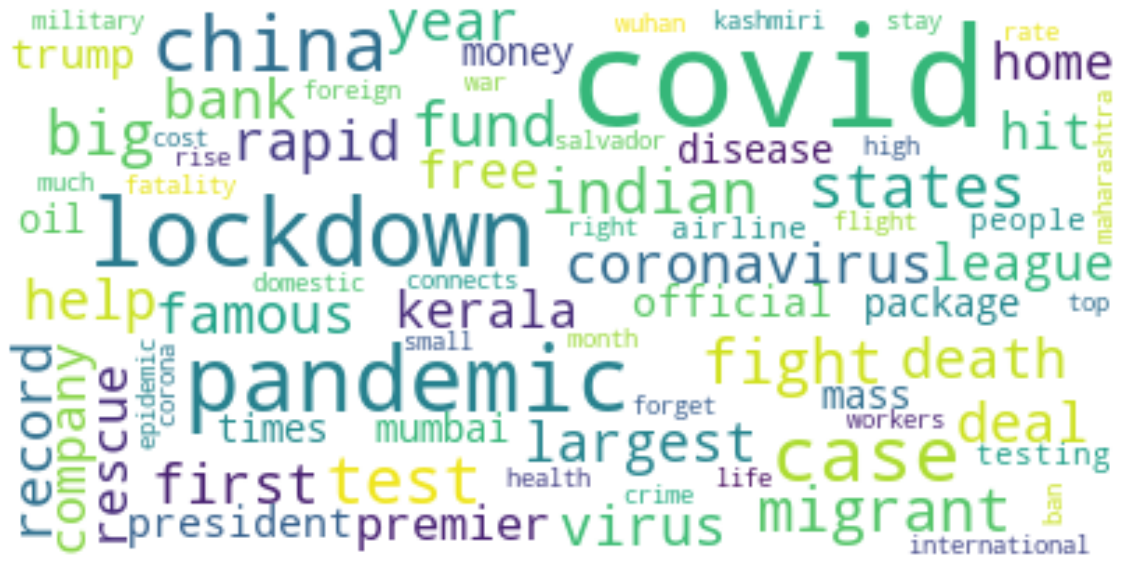

--------------------------May  2020--------------------------


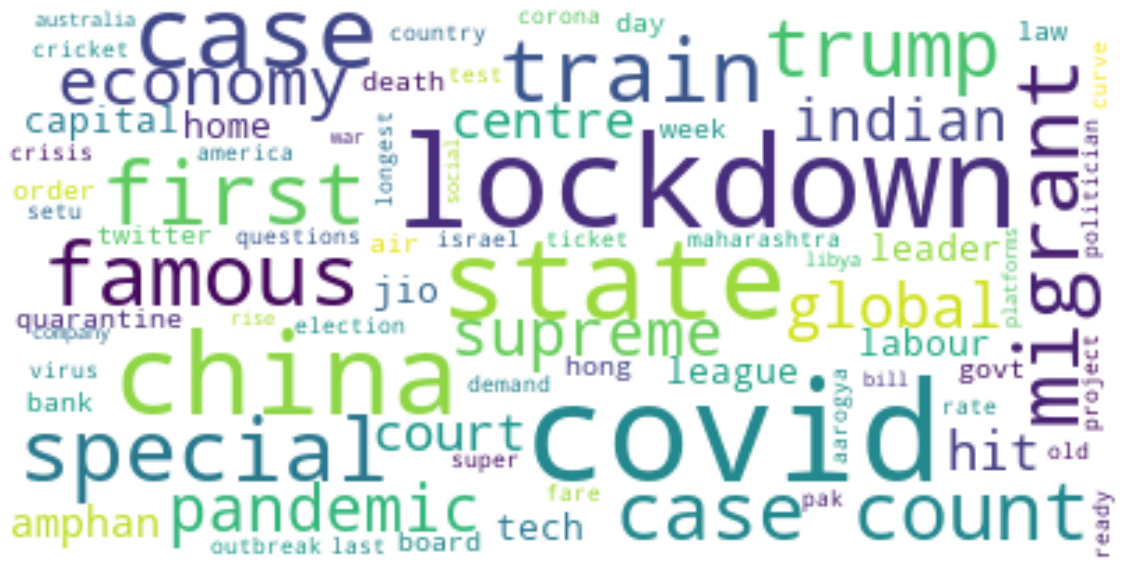

--------------------------June  2020--------------------------


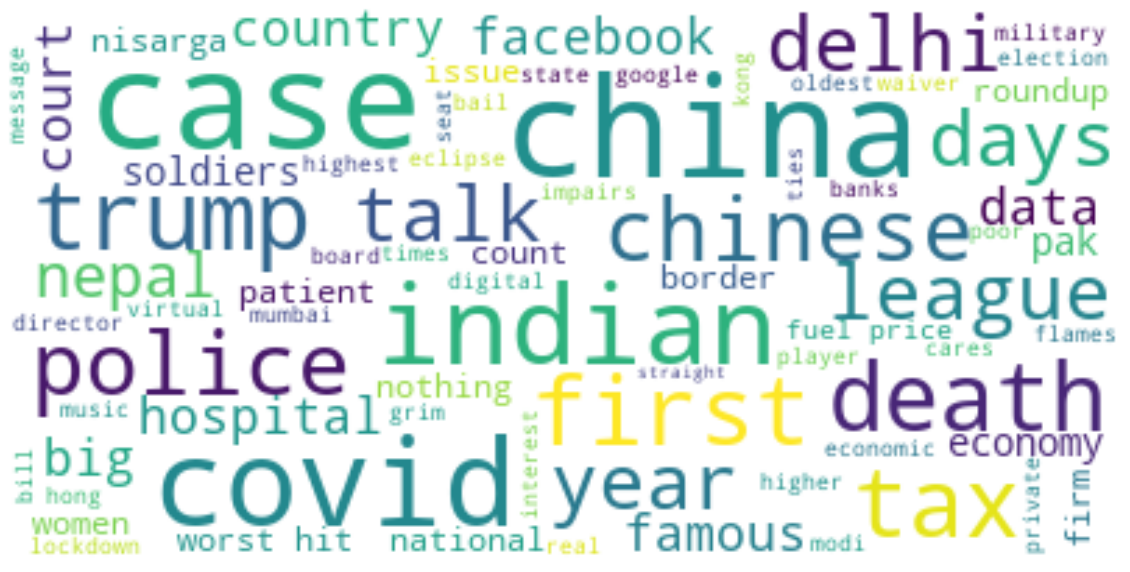

--------------------------July  2020--------------------------


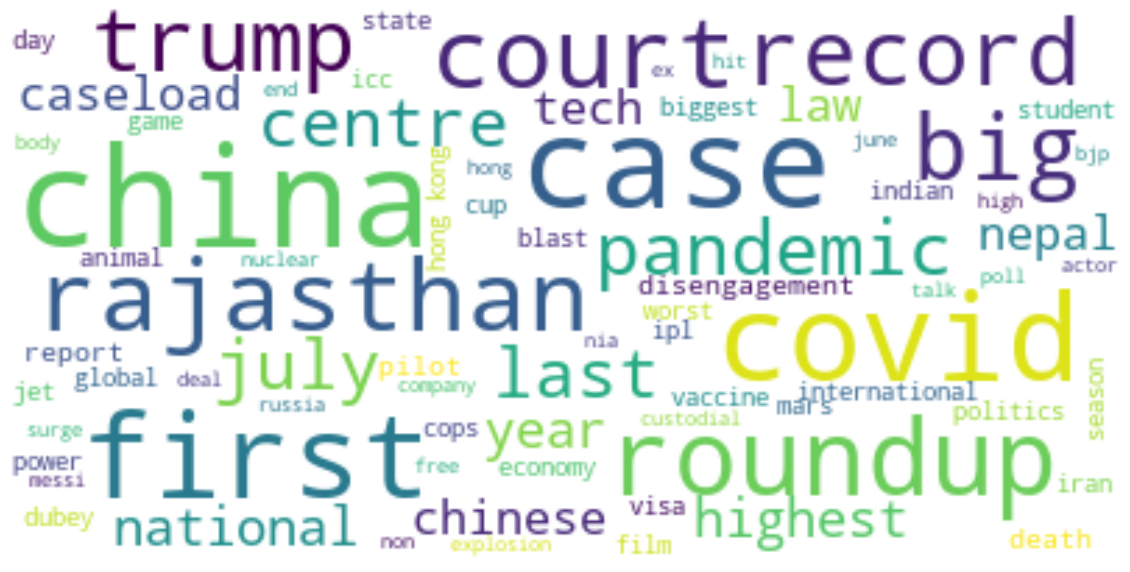

--------------------------August  2020--------------------------


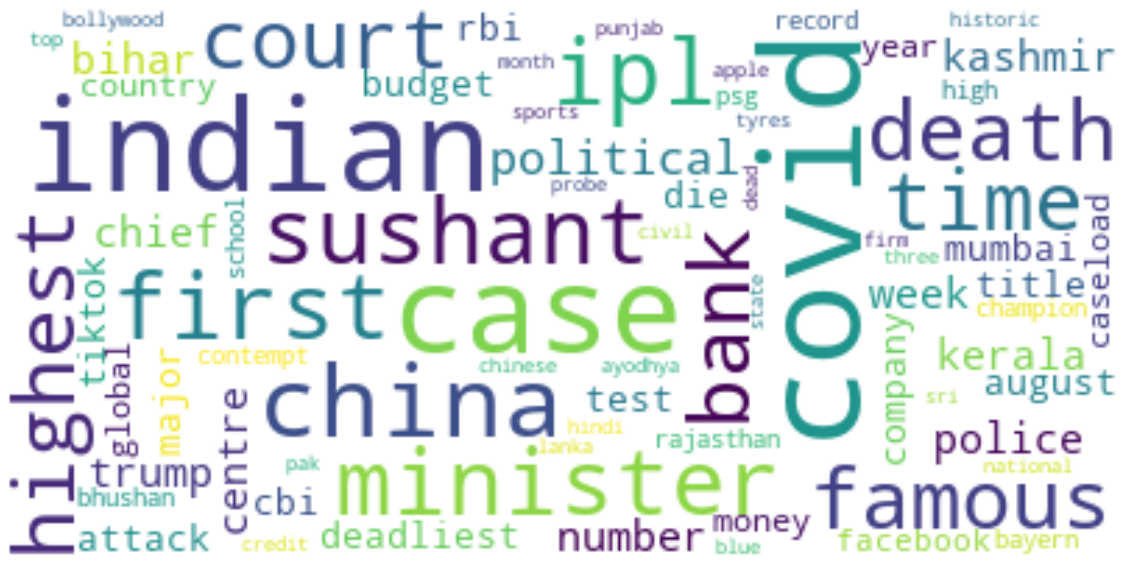

--------------------------September  2020--------------------------


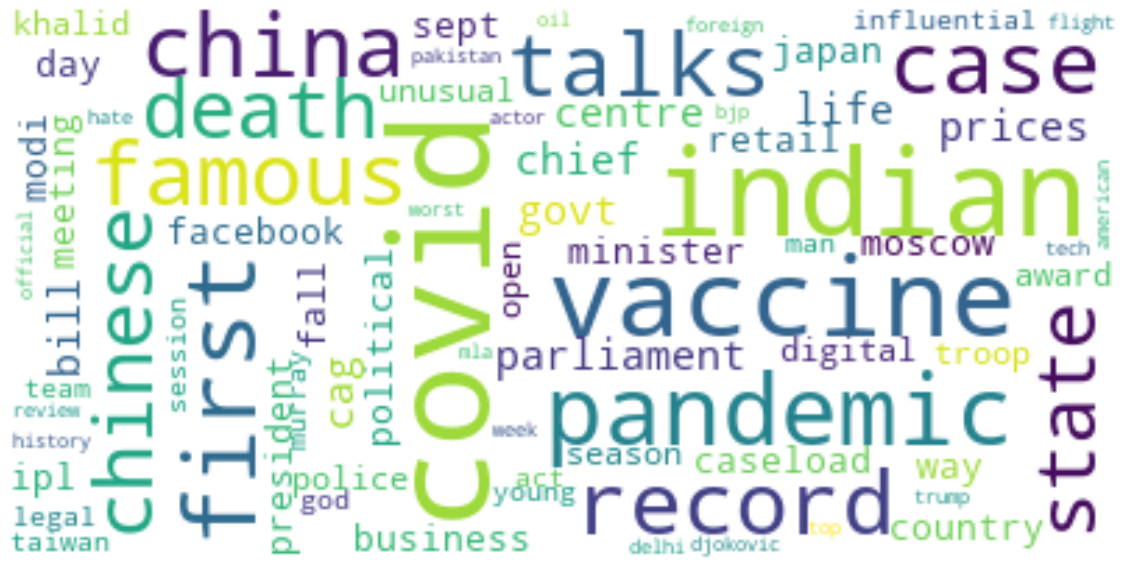

--------------------------October  2020--------------------------


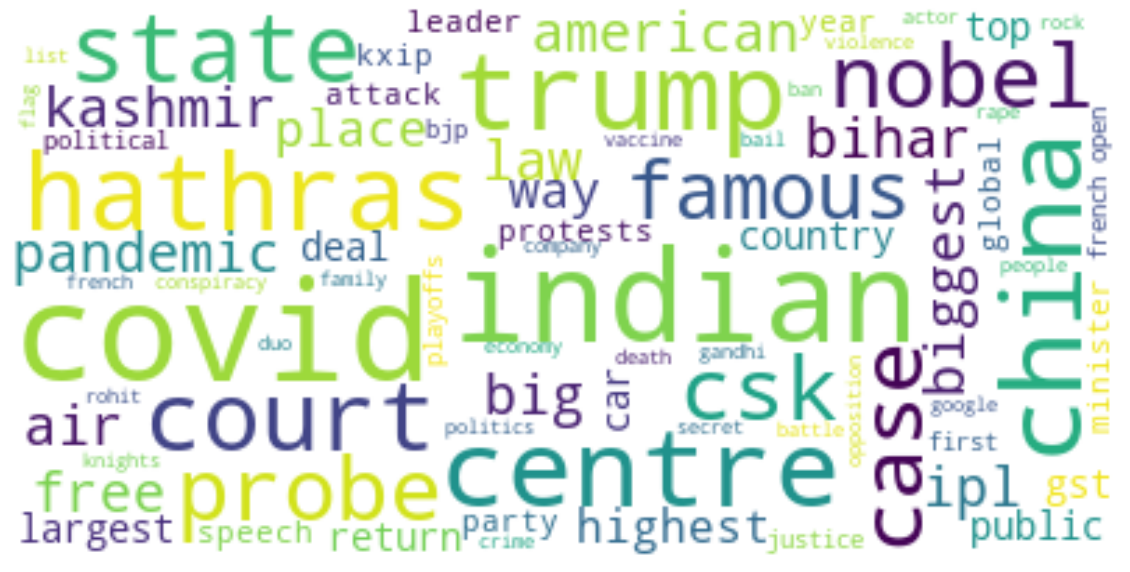

--------------------------November  2020--------------------------


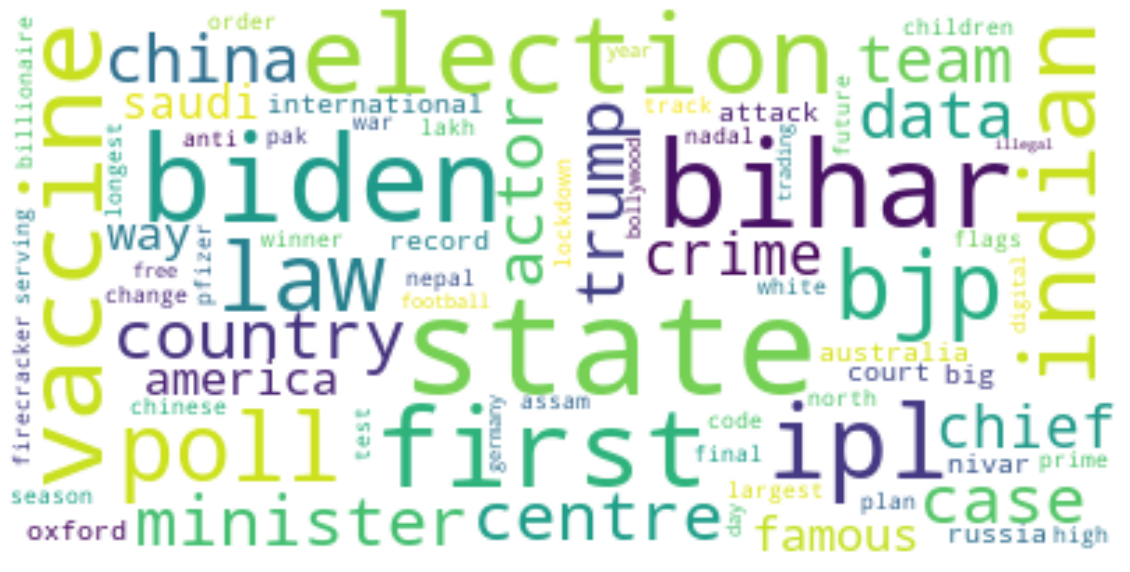

--------------------------December  2020--------------------------


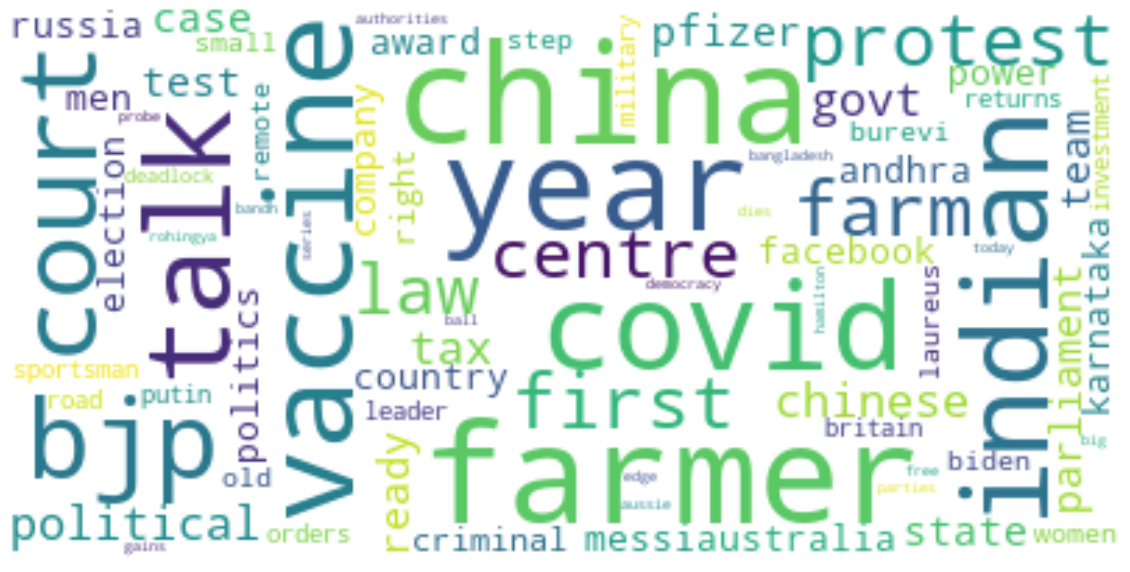

--------------------------January  2021--------------------------


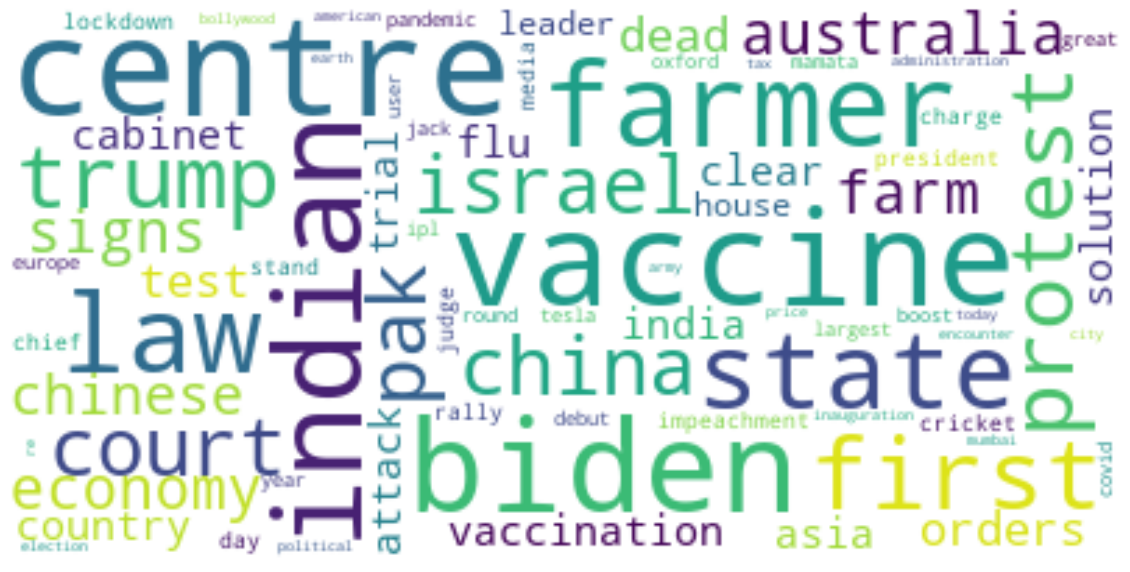

--------------------------Feburary  2021--------------------------


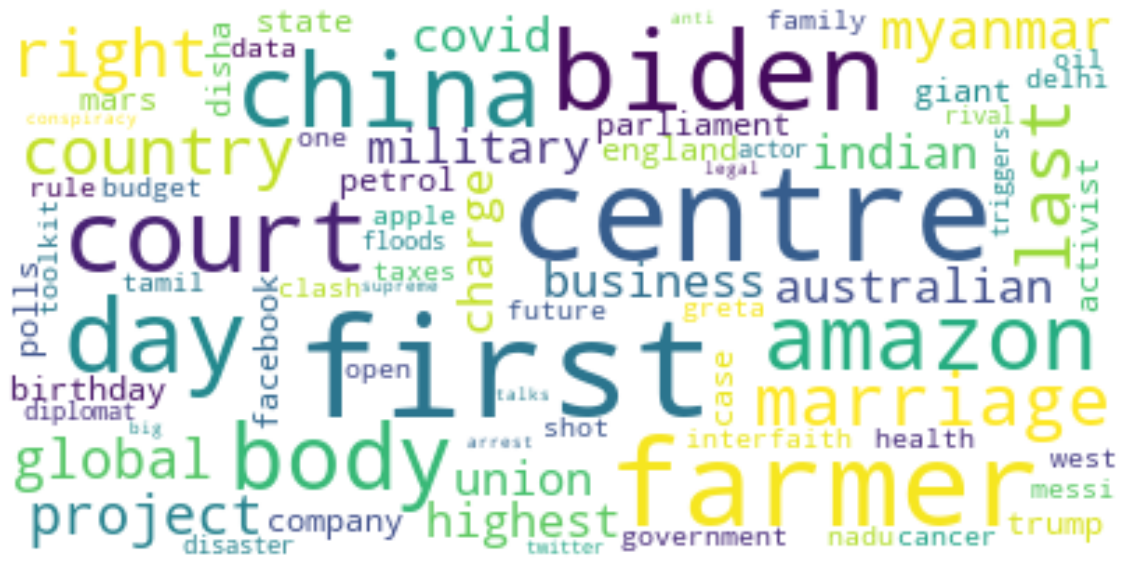

--------------------------March  2021--------------------------


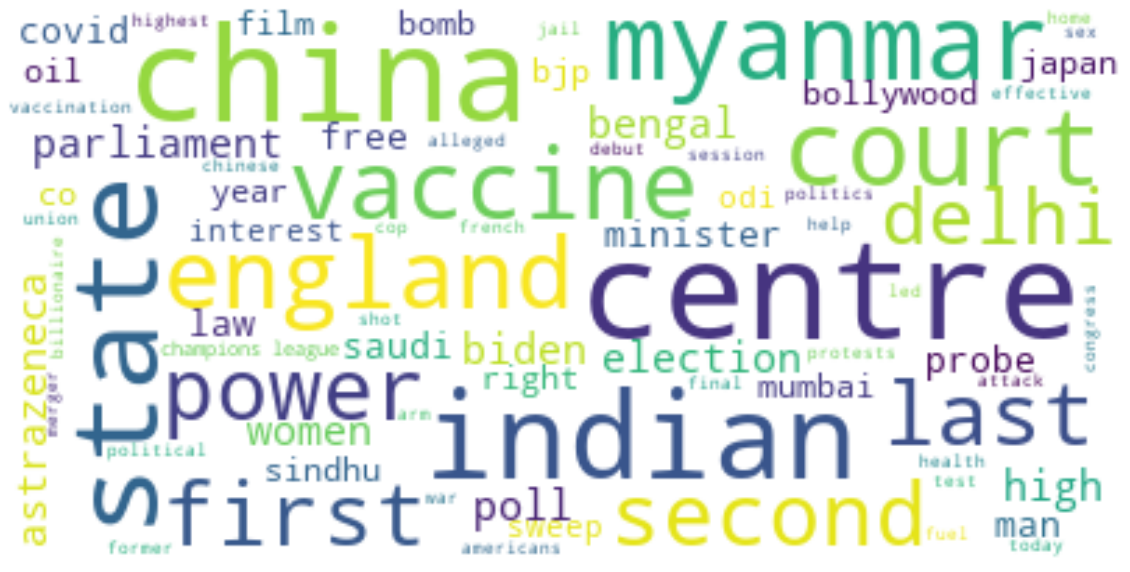

--------------------------April  2021--------------------------


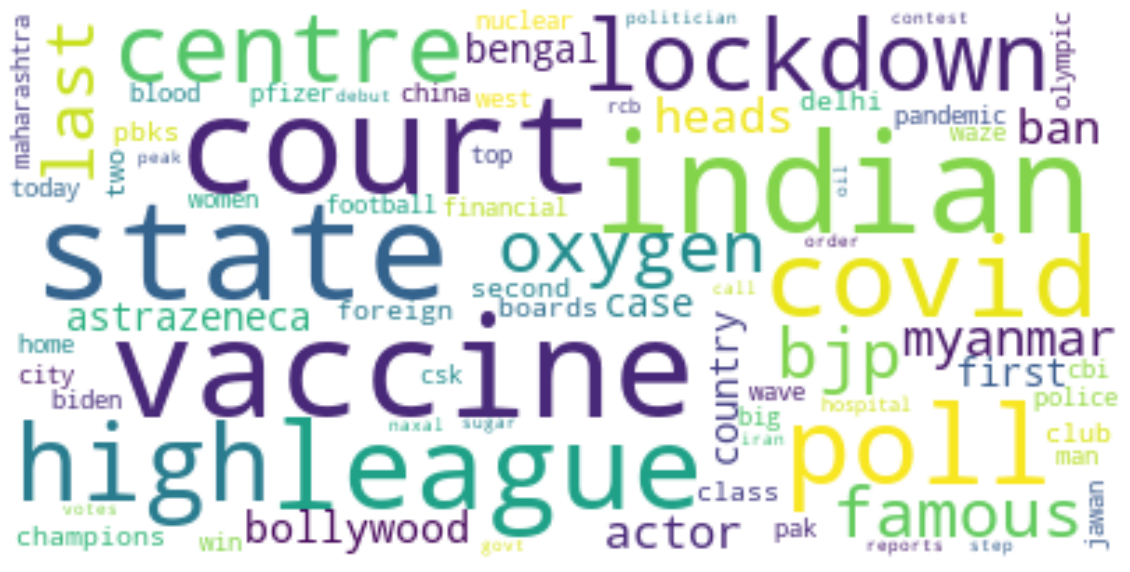

In [12]:
shape = df.shape
for i in range(shape[0]):
    print("--------------------------" + df.at[i, 'Month'] + "  " + df.at[i, 'Year'] + "--------------------------")
    generate_wordcloud(df.at[i , 'Headlines'])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
def get_top_n_words(corpus, n=10):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [15]:
for i in range(shape[0]):
    print("--------------------------" + df.at[i, 'Month'] + "  " + df.at[i, 'Year'] + "--------------------------")
    headlines_list = [df.at[i , 'Headlines']]
    print(get_top_n_words(headlines_list, 75))

--------------------------April  2020--------------------------
[('covid', 33), ('lockdown', 12), ('pandemic', 11), ('china', 8), ('cases', 6), ('big', 5), ('states', 5), ('migrant', 4), ('coronavirus', 4), ('virus', 4), ('death', 4), ('help', 4), ('rapid', 4), ('largest', 4), ('famous', 4), ('year', 4), ('fight', 4), ('test', 4), ('home', 3), ('kerala', 3), ('indian', 3), ('bank', 3), ('league', 3), ('company', 3), ('free', 3), ('rescue', 3), ('premier', 3), ('president', 3), ('trump', 3), ('package', 3), ('mumbai', 3), ('mass', 3), ('disease', 3), ('money', 3), ('deal', 3), ('oil', 3), ('fund', 3), ('times', 3), ('testing', 3), ('record', 3), ('people', 3), ('airline', 3), ('kashmiri', 2), ('international', 2), ('ban', 2), ('cost', 2), ('month', 2), ('military', 2), ('hit', 2), ('funds', 2), ('war', 2), ('flight', 2), ('epidemic', 2), ('fatality', 2), ('forget', 2), ('tests', 2), ('right', 2), ('life', 2), ('corona', 2), ('high', 2), ('rate', 2), ('health', 2), ('domestic', 2), ('off

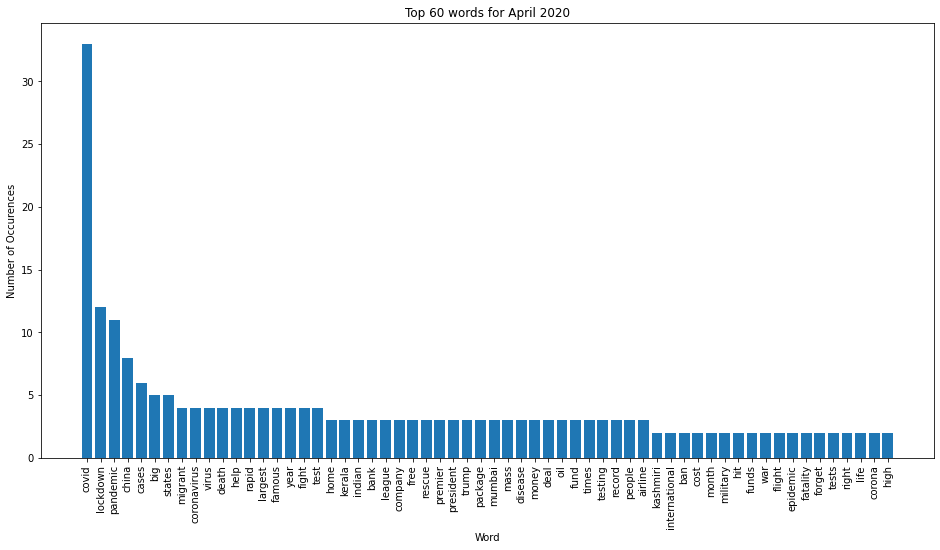

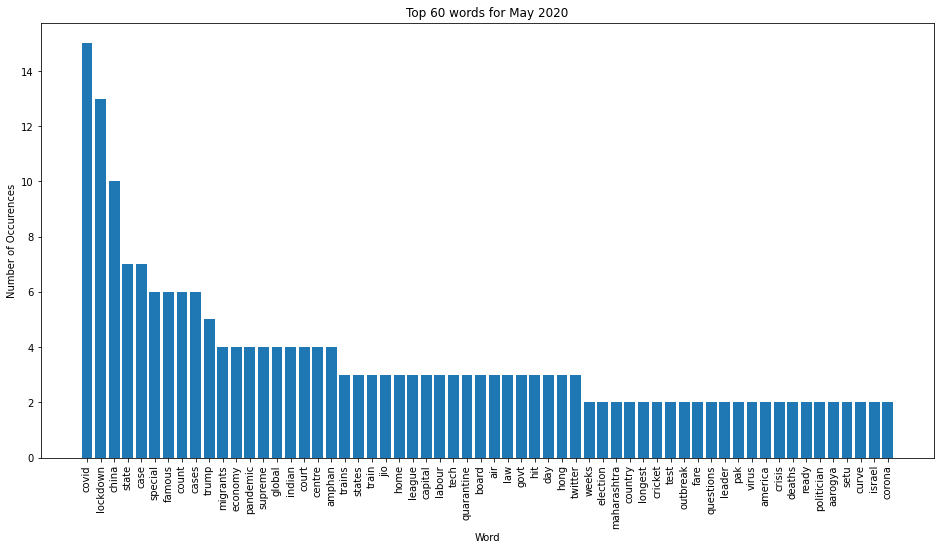

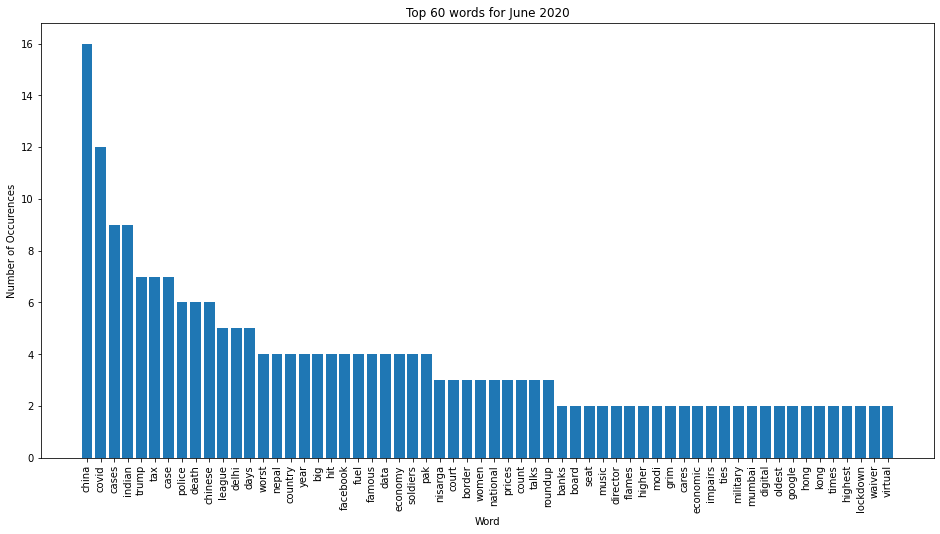

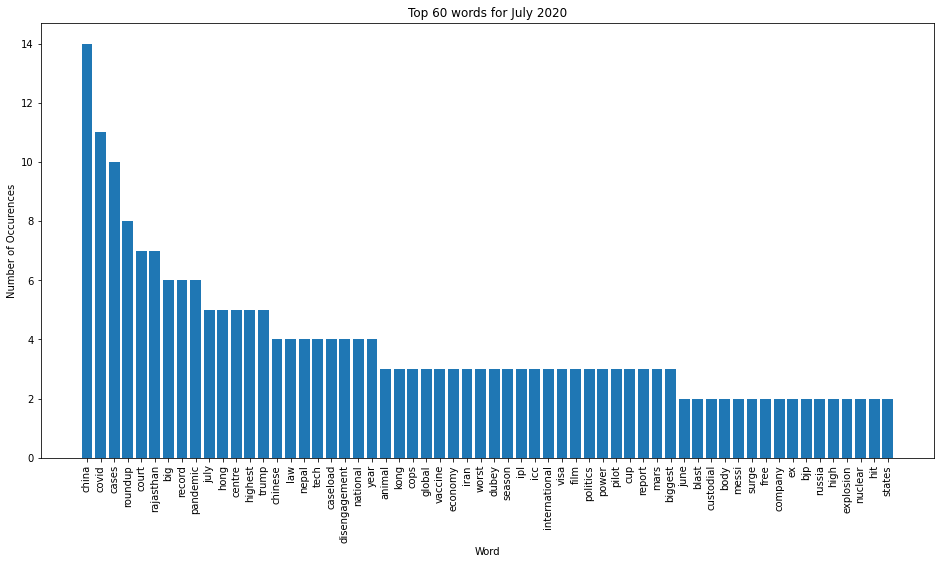

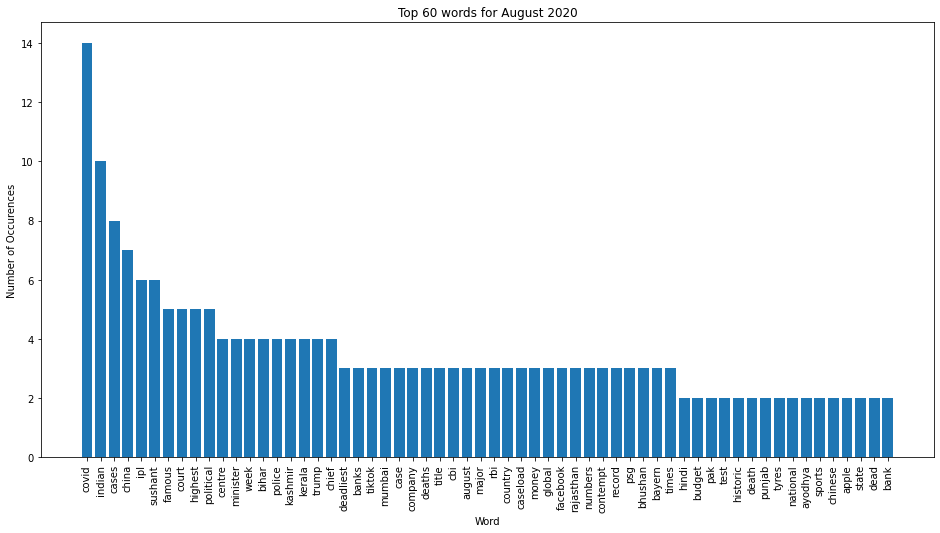

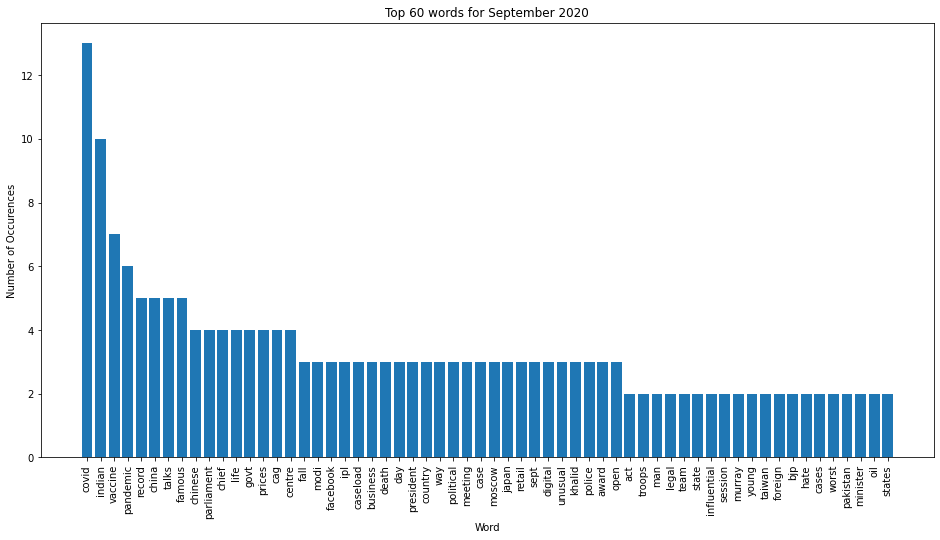

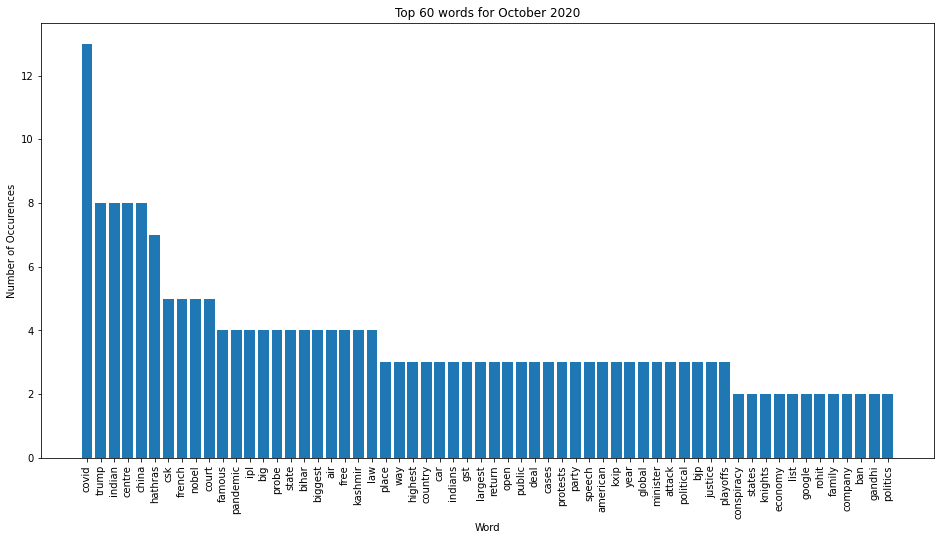

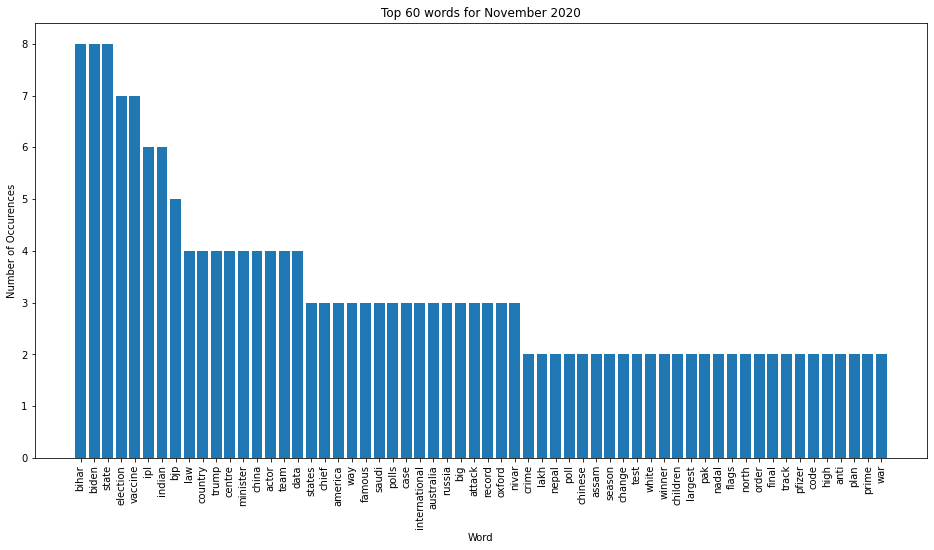

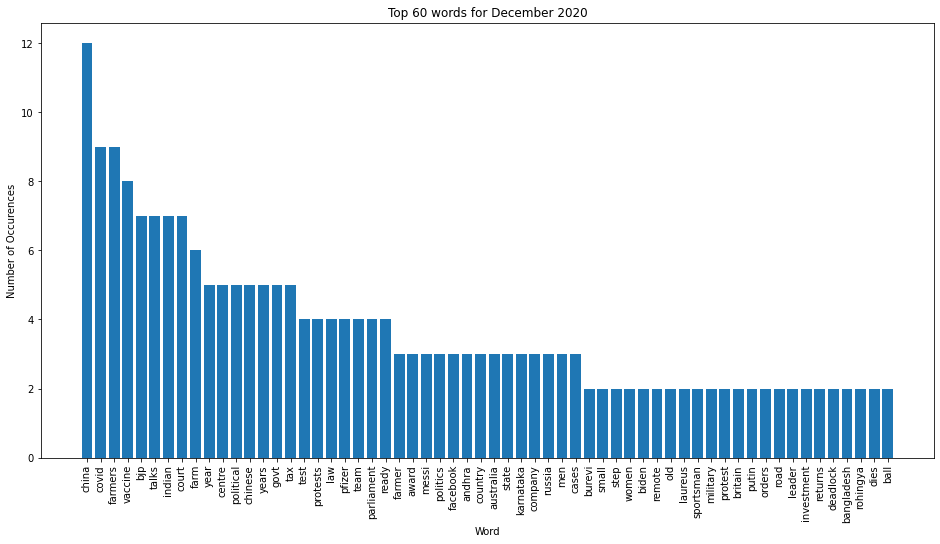

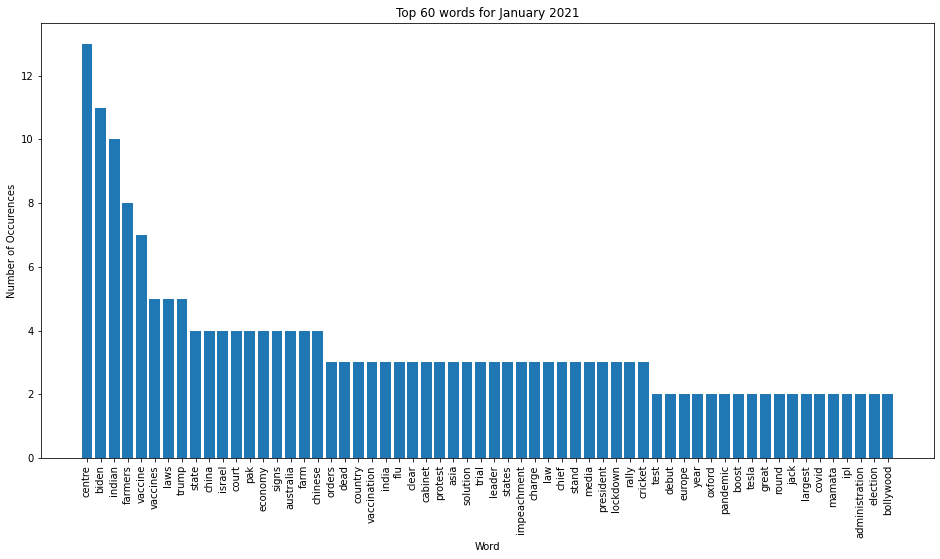

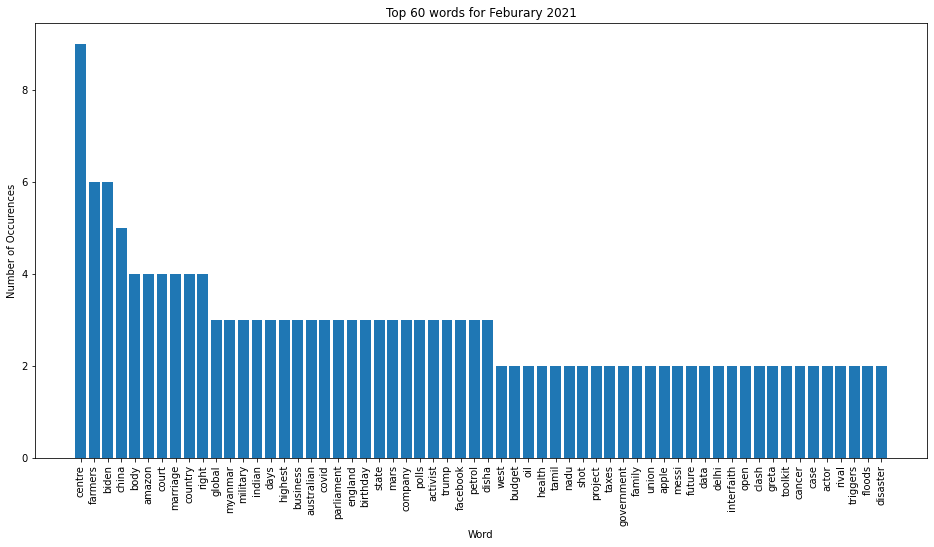

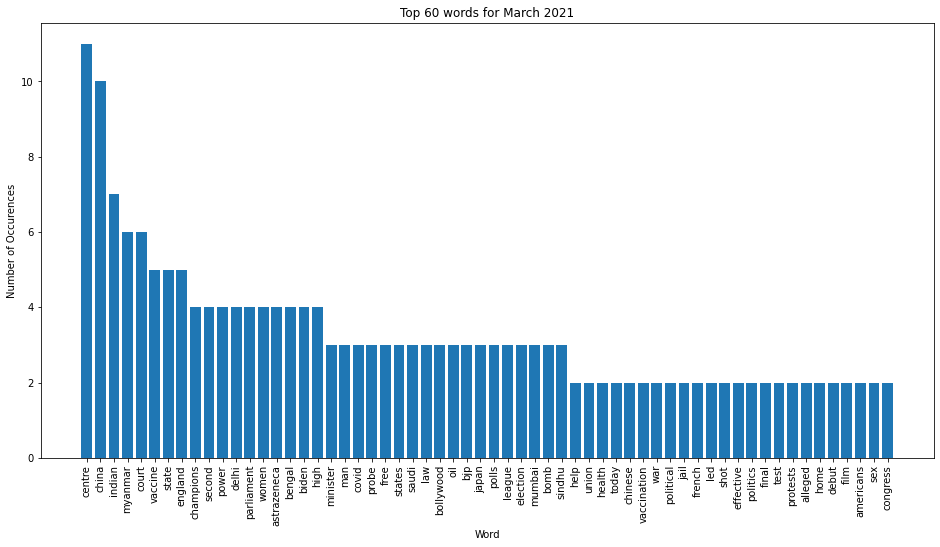

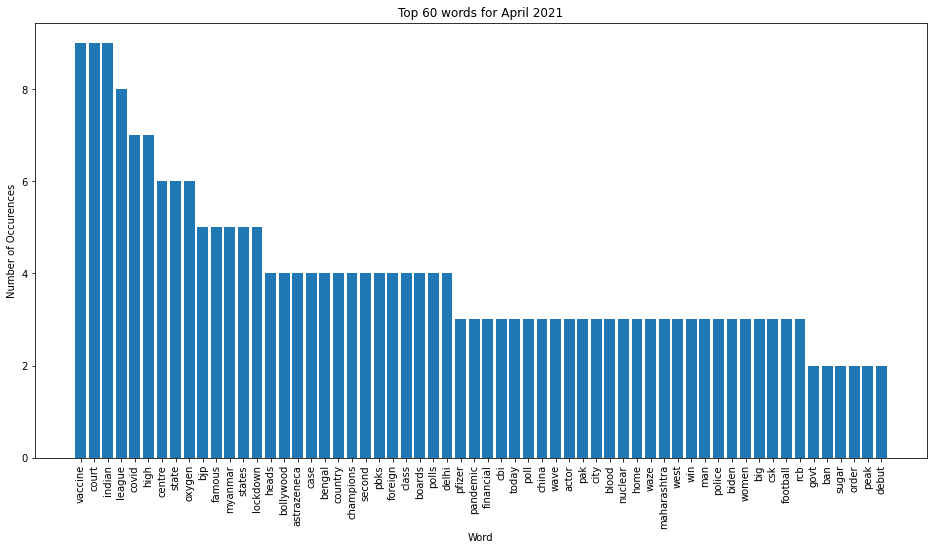

In [20]:
for k in range(shape[0]):
    headlines_list = [df.at[k , 'Headlines']]
    words = []
    word_values = []
    for i,j in get_top_n_words(headlines_list, 60):
      words.append(i)
      word_values.append(j)
    fig, ax = plt.subplots(figsize=(16,8))
    plt.rcParams["figure.figsize"] = (20,3)
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    ax.bar(range(len(words)), word_values)
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation='vertical')
    ax.set_title('Top 60 words for {} {}'.format(df.at[k, 'Month'], df.at[k, 'Year']))
    ax.set_xlabel('Word')
    ax.set_ylabel('Number of Occurences')
    plt.show()


LDA Analysis 

In [21]:
cv = CountVectorizer(ngram_range=(1,2))

data_cv = cv.fit_transform(df['Headlines'])
df_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df.index

In [22]:
from gensim import corpora, models, matutils
from gensim.models.coherencemodel import CoherenceModel
import scipy.sparse

In [23]:
tdm = df_dtm.transpose()
tdm.head()

0   1   2   3   4   5   6   7   8   9   10  11  12
aadhaar            0   0   0   0   0   0   0   0   0   1   0   0   1
aadhaar database   0   0   0   0   0   0   0   0   0   0   0   0   1
aadhaar fruit      0   0   0   0   0   0   0   0   0   1   0   0   0
aadhar             0   0   0   0   0   0   0   0   0   0   0   1   0
aadhar japan       0   0   0   0   0   0   0   0   0   0   0   1   0

In [24]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [25]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
texts = [[word for word in list(cv.vocabulary_.keys())]]
dictionary = corpora.Dictionary(texts)

In [26]:
import logging
logging.basicConfig(filename='MigrantsLda.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO, force=True)

In [27]:
lda_model = models.LdaModel(corpus=corpus, num_topics= 8, id2word=id2word, passes=150)
lda_model.print_topics(8,25)

[(0,
  '0.009*"covid" + 0.005*"china" + 0.003*"cases" + 0.003*"first" + 0.003*"indian" + 0.003*"pandemic" + 0.003*"lockdown" + 0.002*"famous" + 0.002*"trump" + 0.002*"record" + 0.002*"court" + 0.002*"centre" + 0.002*"case" + 0.001*"global" + 0.001*"ipl" + 0.001*"big" + 0.001*"states" + 0.001*"chinese" + 0.001*"death" + 0.001*"state" + 0.001*"tech" + 0.001*"govt" + 0.001*"highest" + 0.001*"year" + 0.001*"vaccine"'),
 (1,
  '0.003*"indian" + 0.003*"covid" + 0.002*"state" + 0.002*"trump" + 0.002*"bihar" + 0.002*"centre" + 0.002*"china" + 0.002*"ipl" + 0.002*"first" + 0.002*"biden" + 0.002*"vaccine" + 0.002*"law" + 0.002*"election" + 0.002*"bjp" + 0.001*"minister" + 0.001*"big" + 0.001*"famous" + 0.001*"hathras" + 0.001*"country" + 0.001*"court" + 0.001*"attack" + 0.001*"team" + 0.001*"way" + 0.001*"kashmir" + 0.001*"free"'),
 (2,
  '0.003*"centre" + 0.003*"china" + 0.002*"indian" + 0.002*"myanmar" + 0.002*"court" + 0.002*"england" + 0.002*"state" + 0.002*"vaccine" + 0.001*"second" + 0.001

In [28]:
lda_model1 = models.LdaModel(corpus=corpus, num_topics= 20, id2word=id2word, passes=80, iterations= 9000)
lda_model1.print_topics(20,25)

[(0,
  '0.006*"centre" + 0.005*"biden" + 0.004*"indian" + 0.003*"farmers" + 0.003*"vaccine" + 0.003*"first" + 0.003*"laws" + 0.003*"vaccines" + 0.002*"trump" + 0.002*"pak" + 0.002*"state" + 0.002*"australia" + 0.002*"chinese" + 0.002*"farm" + 0.002*"court" + 0.002*"china" + 0.002*"signs" + 0.002*"israel" + 0.002*"economy" + 0.002*"vaccination" + 0.001*"cricket" + 0.001*"dead" + 0.001*"india" + 0.001*"president" + 0.001*"states"'),
 (1,
  '0.000*"pengyou" + 0.000*"peninsular life" + 0.000*"peninsular" + 0.000*"pentagon" + 0.000*"pearl" + 0.000*"people" + 0.000*"people alliance" + 0.000*"people amid" + 0.000*"pensioners green" + 0.000*"pentagon papers" + 0.000*"pengyou lanes" + 0.000*"peninsula country" + 0.000*"pearl murder" + 0.000*"penalty" + 0.000*"pegasus spyware" + 0.000*"pegasus hacking" + 0.000*"pegasus" + 0.000*"peer reviewed" + 0.000*"peer review" + 0.000*"peer" + 0.000*"pebble pacific" + 0.000*"pebble" + 0.000*"peninsula" + 0.000*"penalty race" + 0.000*"pensioners"'),
 (2,
  '

In [29]:
lda_model2 = models.LdaModel(corpus=corpus, num_topics= 6, id2word=id2word, passes= 200, iterations= 9000)
lda_model2.print_topics(6,25)

[(0,
  '0.000*"crimes" + 0.000*"russian" + 0.000*"taiwan" + 0.000*"list" + 0.000*"longest" + 0.000*"face" + 0.000*"bollywood debut" + 0.000*"look" + 0.000*"states" + 0.000*"long" + 0.000*"bollywood" + 0.000*"facebook" + 0.000*"famous politician" + 0.000*"black" + 0.000*"stock" + 0.000*"factory" + 0.000*"life" + 0.000*"bjp" + 0.000*"level" + 0.000*"famous" + 0.000*"birthday" + 0.000*"super" + 0.000*"famous global" + 0.000*"strike" + 0.000*"lockdown"'),
 (1,
  '0.009*"covid" + 0.003*"lockdown" + 0.003*"pandemic" + 0.002*"china" + 0.002*"cases" + 0.001*"states" + 0.001*"big" + 0.001*"fight" + 0.001*"coronavirus" + 0.001*"help" + 0.001*"test" + 0.001*"death" + 0.001*"largest" + 0.001*"virus" + 0.001*"year" + 0.001*"famous" + 0.001*"migrant" + 0.001*"rapid" + 0.001*"first" + 0.001*"kerala" + 0.001*"mumbai" + 0.001*"times" + 0.001*"deal" + 0.001*"mass" + 0.001*"oil"'),
 (2,
  '0.003*"covid" + 0.003*"indian" + 0.003*"vaccine" + 0.002*"famous" + 0.002*"court" + 0.002*"centre" + 0.002*"first" +

In [30]:
lda3 = models.LdaModel(corpus=corpus, num_topics= 15, id2word=id2word, passes=60, iterations= 9000)
lda3.print_topics(15,25)

[(0,
  '0.000*"pengyou" + 0.000*"peninsular life" + 0.000*"peninsular" + 0.000*"pentagon" + 0.000*"pearl" + 0.000*"people" + 0.000*"people alliance" + 0.000*"people amid" + 0.000*"pensioners green" + 0.000*"pentagon papers" + 0.000*"pengyou lanes" + 0.000*"peninsula country" + 0.000*"pearl murder" + 0.000*"penalty" + 0.000*"pegasus spyware" + 0.000*"pegasus hacking" + 0.000*"pegasus" + 0.000*"peer reviewed" + 0.000*"peer review" + 0.000*"peer" + 0.000*"pebble pacific" + 0.000*"pebble" + 0.000*"peninsula" + 0.000*"penalty race" + 0.000*"pensioners"'),
 (1,
  '0.004*"china" + 0.004*"farmers" + 0.003*"covid" + 0.003*"vaccine" + 0.003*"talks" + 0.003*"bjp" + 0.003*"court" + 0.002*"farm" + 0.002*"indian" + 0.002*"years" + 0.002*"govt" + 0.002*"year" + 0.002*"political" + 0.002*"chinese" + 0.002*"tax" + 0.002*"centre" + 0.002*"first" + 0.002*"parliament" + 0.002*"pfizer" + 0.002*"protests" + 0.002*"ready" + 0.002*"test" + 0.002*"team" + 0.002*"law" + 0.001*"men"'),
 (2,
  '0.000*"indian" + 0

In [31]:
lda_model4 = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes= 80, iterations= 9000)
lda_model4.print_topics()

[(0,
  '0.006*"covid" + 0.004*"china" + 0.003*"indian" + 0.003*"first" + 0.003*"centre" + 0.002*"cases" + 0.002*"lockdown" + 0.002*"trump" + 0.002*"court" + 0.002*"farmers"'),
 (1,
  '0.000*"fast" + 0.000*"risk" + 0.000*"haaland" + 0.000*"varavara rao" + 0.000*"territory" + 0.000*"change" + 0.000*"front" + 0.000*"varavara" + 0.000*"acid" + 0.000*"isro"'),
 (2,
  '0.003*"indian" + 0.003*"vaccine" + 0.003*"covid" + 0.002*"first" + 0.002*"state" + 0.002*"centre" + 0.002*"famous" + 0.001*"bjp" + 0.001*"court" + 0.001*"china"'),
 (3,
  '0.004*"china" + 0.003*"covid" + 0.003*"centre" + 0.002*"court" + 0.002*"indian" + 0.002*"first" + 0.002*"cases" + 0.002*"trump" + 0.001*"law" + 0.001*"highest"')]

In [32]:
lda_model6 = models.LdaModel(corpus=corpus, num_topics= 6, id2word=id2word, passes=300, iterations= 9000)
lda_model6.print_topics(6,25)

[(0,
  '0.000*"rao" + 0.000*"barca" + 0.000*"apps" + 0.000*"armed" + 0.000*"serving" + 0.000*"official" + 0.000*"moon" + 0.000*"budget" + 0.000*"dispute" + 0.000*"triggers" + 0.000*"safety" + 0.000*"post" + 0.000*"last" + 0.000*"months" + 0.000*"election" + 0.000*"disputes" + 0.000*"victory" + 0.000*"city" + 0.000*"session" + 0.000*"longest serving" + 0.000*"vice president" + 0.000*"vice" + 0.000*"month" + 0.000*"lanka" + 0.000*"indian"'),
 (1,
  '0.004*"china" + 0.003*"covid" + 0.003*"centre" + 0.003*"indian" + 0.003*"state" + 0.003*"first" + 0.002*"vaccine" + 0.002*"court" + 0.002*"bjp" + 0.002*"law" + 0.002*"election" + 0.002*"lockdown" + 0.002*"biden" + 0.002*"farmers" + 0.001*"cases" + 0.001*"case" + 0.001*"famous" + 0.001*"trump" + 0.001*"test" + 0.001*"minister" + 0.001*"states" + 0.001*"chinese" + 0.001*"country" + 0.001*"saudi" + 0.001*"team"'),
 (2,
  '0.007*"covid" + 0.004*"china" + 0.004*"indian" + 0.003*"cases" + 0.003*"first" + 0.002*"trump" + 0.002*"centre" + 0.002*"lock